In [3]:
from sklearn.datasets import make_blobs#聚类数据生成器,检测聚类算法
from sklearn.svm import SVC 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
X

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

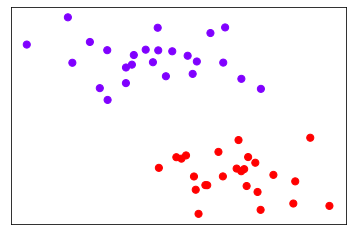

In [15]:
plt.scatter(X[:,0],X[:,1]
            ,c=y
            ,s=50 #size
            ,cmap='rainbow'
           )
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
'''画等高线'''

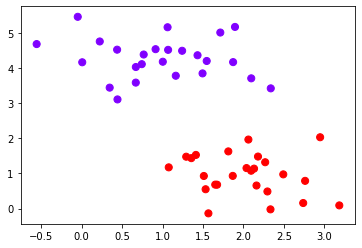

In [16]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

In [18]:
xlim = ax.get_xlim() #获得图形点边界
ylim = ax.get_ylim()
xlim 

(-0.7541740493109252, 3.3838081780236036)

In [27]:
#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30) #分别把x,y方向拆分成30个点
axisy = np.linspace(ylim[0],ylim[1],30)
axisy,axisx = np.meshgrid(axisy,axisx) #做成点网格

In [29]:
len([axisx.ravel(), axisy.ravel()])

2

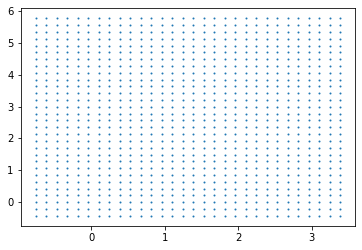

In [31]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T

plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

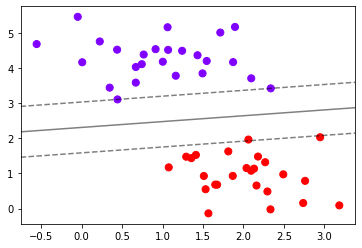

In [37]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

clf = SVC(kernel = "linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)#返回前面均匀分布的900个点对应的到决策边界的位置
#决策边界z是个超平面!!!

'''通过网格的900个点画出距离超平面相等的等高线'''
ax.contour(axisx,axisy,Z
            ,colors="k"
            ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
            ,alpha=0.5
            ,linestyles=["--","-","--"])

In [32]:
ax.set_xlim(xlim)
ax.set_ylim(ylim)

(-0.43660961990940284, 5.772756283035797)

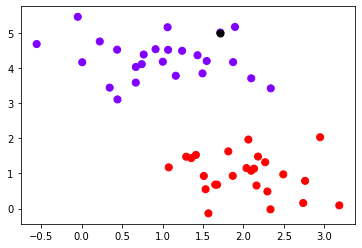

In [42]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow")

In [45]:
clf.decision_function(X[10].reshape(1,2))

array([-3.33917354])

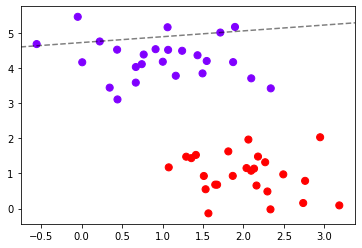

In [48]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy, Z
            ,colors="k"
            ,levels=[-3.33917354]
            ,alpha=0.5
            ,linestyles=["--"])

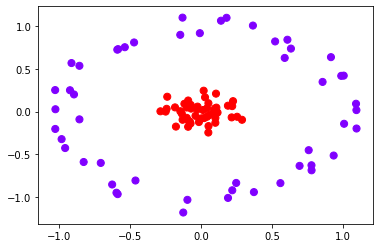

In [53]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

In [ ]:
'''画图函数'''
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [55]:
clf.predict(X)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

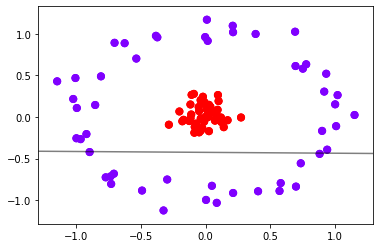